# 0. Import dependencies

In [37]:
import torch
import sklearn
import numpy as np
import matplotlib.pyplot as plt


In [38]:
from sklearn.datasets import make_classification
torch.manual_seed(123)


# 1. Working with datasets

## 1.1 Creating the datasets
Creating a toy dataset with `sklearn.make_classification()`.

In [39]:
# Make a Toy Dataset
features = 4
samples = 100000

X, y = make_classification(n_samples=samples, n_features=features, n_classes=2)

# Change it into the Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


In [40]:
print(f'X: {X.ndim} dim(s)\n', 'Shape of X: ', np.shape(X), '\n', X, sep='')

X: 2 dim(s)
Shape of X: torch.Size([100000, 4])
tensor([[-0.8141,  0.8898, -0.6331, -1.1690],
        [-0.9627, -1.5659, -1.4388,  2.1167],
        [-1.0773,  0.4625, -1.0263, -0.5913],
        ...,
        [ 0.4604,  1.5521,  0.8998, -2.0858],
        [-0.8777,  0.7416, -0.7399, -0.9693],
        [-0.8461,  1.1429, -0.6005, -1.5064]])


In [41]:
print(f'y: {y.ndim} dim(s)\n', 'Shape of y: ', np.shape(y), '\n', y, sep='')

y: 1 dim(s)
Shape of y: torch.Size([100000])
tensor([0., 1., 0.,  ..., 0., 0., 0.])


## 1.2 Shuffling the datasets
Shuffling using the `torch.randperm()` function. Learn more about this function [here](https://pytorch.org/docs/stable/generated/torch.randperm.html).

Here, the first argument needs to be the size `n` in `int`. The `y.size()` simply won't work since the `torch.Tensor.size()` function returns the size as an object. We pass in the first dimension (0th) to retrieve size of the first dim in `int`. Values other than 0 won't work since this tensor only has one dim. 

In [42]:
# Shuffling data
torch.manual_seed(10)

# Creating a shuffled dataset ranging from 0 to n - 1 (999)
shuffledData = torch.randperm(y.size(0), dtype=torch.long)

# Printing a sample from our shuffled data
print(f'Sampled shuffled data:\n\n{shuffledData[:10]}')


Sampled shuffled data:

tensor([96937, 82237, 30716, 11299,  7300, 29850, 81165, 82223, 42625, 73309])


In [43]:
print(f'Shuffled generated data:\n\n{shuffledData}')

Shuffled generated data:

tensor([96937, 82237, 30716,  ..., 58528, 83057, 65854])


We've created a list of indices that are sorted. Now mapping the shuffled indices to create a shuffled dataset.

In [44]:
X, y = X[shuffledData], y[shuffledData]

In [45]:
print(f'Shuffled X:\n\n{X}')

Shuffled X:

tensor([[-1.3658,  0.0349, -1.4464, -0.0127],
        [ 2.3995, -1.4548,  2.1738,  1.8846],
        [-0.2680,  1.3485,  0.0698, -1.7956],
        ...,
        [-0.9784,  0.6792, -0.8637, -0.8835],
        [ 1.6470, -0.6164,  1.5928,  0.7829],
        [ 1.6071,  0.4765,  1.8384, -0.6767]])


In [46]:
print(f'Shuffled y:\n\n{y}')


Shuffled y:

tensor([1., 1., 0.,  ..., 0., 1., 0.])


## 1.3 Splitting the dataset into training and testing data

### 1.3.1 Shuffling data

In [47]:
# Train Test split
shuffledTrainDataMakeup = int(shuffledData.size(0) * 0.7)

shuffledTrainData = shuffledData[:shuffledTrainDataMakeup]
shuffledTestData = shuffledData[shuffledTrainDataMakeup:]


How much does the training data make up of the actual dataset.

In [48]:
print(f'Training data makeup: {shuffledTrainDataMakeup}\n\n')


Training data makeup: 70000




Details of the training data.

In [49]:
print(f'Printing details of training data\n\nShape: {np.shape(shuffledTrainData)}\n\nData:\n{shuffledTrainData}')


Printing details of training data

Shape: torch.Size([70000])

Data:
tensor([96937, 82237, 30716,  ..., 23456, 97676, 18388])


Details of the testing data.

In [50]:
print(f'Printing details of testing data\n\nShape: {np.shape(shuffledTestData)}\n\nData:\n{shuffledTestData}')


Printing details of testing data

Shape: torch.Size([30000])

Data:
tensor([37308, 87268,  2132,  ..., 58528, 83057, 65854])


In [51]:
X_train, y_train = X[shuffledTrainData], y[shuffledTrainData]
X_test, y_test = X[shuffledTestData], y[shuffledTestData]


Printing details of shuffled training and testing data

In [52]:
X_train.shape


torch.Size([70000, 4])

In [53]:
X_train


tensor([[ 1.2485,  1.2927,  1.6713, -1.7587],
        [ 1.3342, -1.2355,  1.0963,  1.6181],
        [-0.3942,  0.5596, -0.2726, -0.7381],
        ...,
        [ 0.4756, -1.8497,  0.0193,  2.4602],
        [ 0.6274, -1.4984,  0.2737,  1.9870],
        [-1.0955, -1.3104, -1.5130,  1.7785]])

In [54]:
X_test.shape


torch.Size([30000, 4])

In [55]:
X_test


tensor([[ 0.2027,  0.6215,  0.3799, -0.8356],
        [ 0.2609,  1.3324,  0.6293, -1.7872],
        [ 1.8813, -0.9822,  1.7462,  1.2659],
        ...,
        [ 1.7531, -1.5651,  1.4558,  2.0482],
        [-0.9293,  0.8635, -0.7628, -1.1310],
        [-0.9098, -0.5218, -1.1072,  0.7200]])

## 1.4 Normalising data

In [56]:
mean, std = X_train.mean(0), X_train.std(0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [57]:
X_train.mean(dim=0, keepdim=True)

tensor([[-1.1335e-08, -3.2970e-09, -6.8801e-09, -1.2861e-08]])

In [58]:
X_train

tensor([[ 1.0564,  1.3119,  1.3871, -1.3443],
        [ 1.1294, -1.2630,  0.9073,  1.2461],
        [-0.3415,  0.5653, -0.2348, -0.5614],
        ...,
        [ 0.3986, -1.8884,  0.0087,  1.8920],
        [ 0.5279, -1.5307,  0.2210,  1.5290],
        [-0.9383, -1.3392, -1.2697,  1.3691]])

In [59]:
X_train - 5

tensor([[-3.9436, -3.6881, -3.6129, -6.3443],
        [-3.8706, -6.2630, -4.0927, -3.7539],
        [-5.3415, -4.4347, -5.2348, -5.5614],
        ...,
        [-4.6014, -6.8884, -4.9913, -3.1080],
        [-4.4721, -6.5307, -4.7790, -3.4710],
        [-5.9383, -6.3392, -6.2697, -3.6309]])

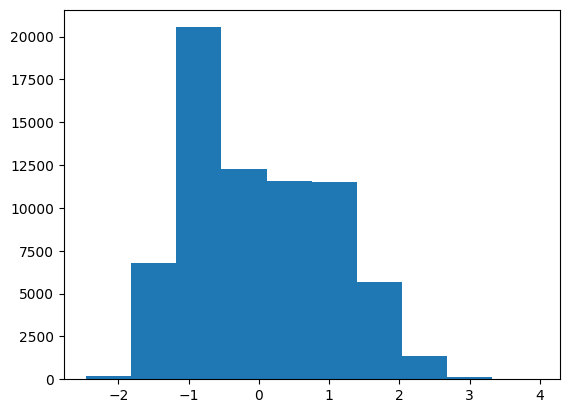

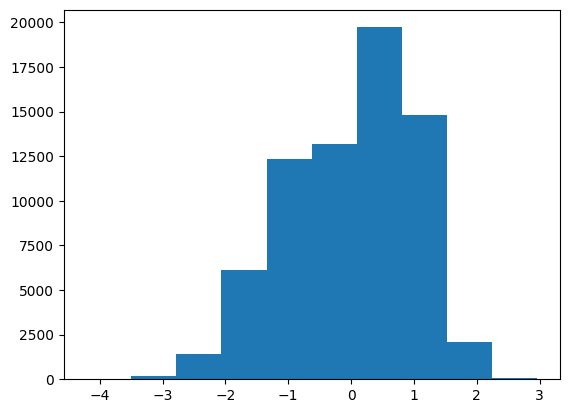

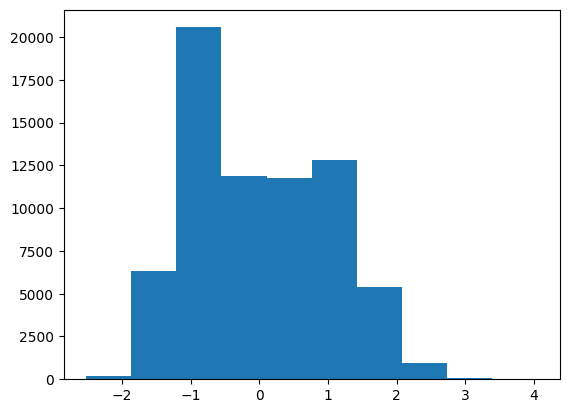

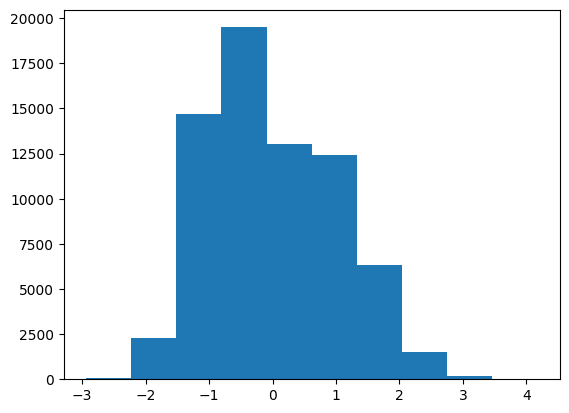

In [60]:
# plt.hist(X_train[0])
for elt in range(features):
    colList = [float(X_train[i][elt]) for i in range(len(X_train))]
    colList

    plt.hist(colList)
    plt.show()


In [61]:
np.std(colList)

0.99999283320748

---

# 2. Building a Neural Network

Importing libraries

In [62]:
import torch.nn as nn
from torch.autograd import grad


Class definition for the neural network

In [63]:
class NN():
    def __init__(self, n_features):
        self.n_features = n_features
        self.weight = torch.zeros(
            size=(n_features, 1), dtype=torch.float, requires_grad=True)
        self.bias = torch.zeros(1, dtype=torch.float, requires_grad=True)

    def forward(self, x):
        output = torch.add(torch.mm(x, self.weight), self.bias)
        return output.view(-1)


Defining our loss function. Looks oddly similar to the mean square error function.

In [64]:
def loss_fn(yHat, y):
    return torch.mean((yHat - y) ** 2)

Function to train the model returning the cost as a list.

In [65]:
def train(model, x, y, n_epoch=10, lr=0.001, seed=23, bsz=50):
    cost = []
    torch.manual_seed(seed)
    
    for i in range(n_epoch):
        shuffledData = torch.randperm(y.size(0))
        batches = torch.split(shuffledData, bsz)

        for idx in batches:
            # 1. Compute the output
            yHat = model.forward(x[idx])

            # 2. Compute the Error
            loss = loss_fn(yHat, y[idx])

            # 3. Compute the gradient
            grad_w = grad(loss, model.weight, retain_graph=True)[0]
            grad_b = grad(loss, model.bias)[0]

            # 4. Update Model Parameters
            model.weight = model.weight - lr * grad_w
            model.bias = model.bias - lr * grad_b

        # 5. Log and print the loss
        with torch.no_grad():
            yHat = model.forward(x)
            curr_loss = loss_fn(yHat, y)
            
            print('Epoch: %3d ' % (i + 1), end="")
            print('| MSE %.5f' % curr_loss)
            
            cost.append(curr_loss)

    return cost


Creating a neural network with 1 feature. Then training that neural net.

In [66]:
model = NN(X_train.size(1))
cost = train(model, X_train, y_train, n_epoch=50)


Epoch:   1 | MSE 0.10668
Epoch:   2 | MSE 0.10573
Epoch:   3 | MSE 0.10572
Epoch:   4 | MSE 0.10572
Epoch:   5 | MSE 0.10574
Epoch:   6 | MSE 0.10573
Epoch:   7 | MSE 0.10573
Epoch:   8 | MSE 0.10572
Epoch:   9 | MSE 0.10572
Epoch:  10 | MSE 0.10573
Epoch:  11 | MSE 0.10572
Epoch:  12 | MSE 0.10572
Epoch:  13 | MSE 0.10572
Epoch:  14 | MSE 0.10572
Epoch:  15 | MSE 0.10573
Epoch:  16 | MSE 0.10572
Epoch:  17 | MSE 0.10573
Epoch:  18 | MSE 0.10572
Epoch:  19 | MSE 0.10573
Epoch:  20 | MSE 0.10572
Epoch:  21 | MSE 0.10573
Epoch:  22 | MSE 0.10572
Epoch:  23 | MSE 0.10573
Epoch:  24 | MSE 0.10573
Epoch:  25 | MSE 0.10573
Epoch:  26 | MSE 0.10572
Epoch:  27 | MSE 0.10572
Epoch:  28 | MSE 0.10572
Epoch:  29 | MSE 0.10573
Epoch:  30 | MSE 0.10573
Epoch:  31 | MSE 0.10572
Epoch:  32 | MSE 0.10572
Epoch:  33 | MSE 0.10572
Epoch:  34 | MSE 0.10573
Epoch:  35 | MSE 0.10574
Epoch:  36 | MSE 0.10573
Epoch:  37 | MSE 0.10572
Epoch:  38 | MSE 0.10572
Epoch:  39 | MSE 0.10574
Epoch:  40 | MSE 0.10573


Plotting the graph relating the epoch and error.

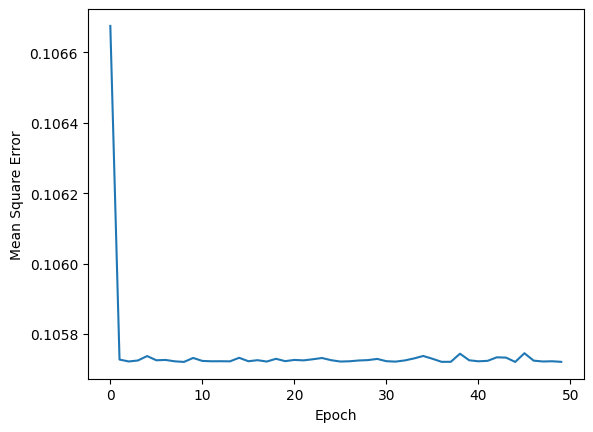

In [67]:
plt.plot(range(len(cost)), cost)

plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')

plt.show()


Calculating the training and testing accuracies.

In [68]:
ones = torch.ones(y_train.size())
zeros = torch.zeros(y_train.size())


In [69]:
train_pred = model.forward(X_train)
train_acc = torch.mean((torch.where(train_pred > 0.5, ones, zeros).int() == y_train).float())

ones = torch.ones(y_test.size())
zeros = torch.zeros(y_test.size())

test_pred = model.forward(X_test)
test_acc = torch.mean((torch.where(test_pred > 0.5, ones, zeros).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc * 100))
print('Testing Accuracy: %.2f' % (test_acc * 100))


Training Accuracy: 88.73
Testing Accuracy: 88.86


---

# 3. Model Using Pytorch

In [70]:
import torch
import sklearn
import torch.nn.functional as F


In [71]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [72]:
# Create The dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=4)

# Normalize the Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Array to Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)

torch.Size([700, 4])
torch.Size([300, 4])


In [74]:
class NeuralNetworkPyTorch(nn.Module):
    def __init__(self, n_features):
        super(NeuralNetworkPyTorch, self).__init__()
        self.linear = nn.Linear(n_features, 1)

        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()

    def forward(self, x):
        out = self.linear(x)
        return out.view(-1)


Overloaded function `train()` to train the neural network built using PyTorch.

In [75]:
def train(model, x, y, n_epoch=10, lr=0.001, seed=23, bsz=50):
    cost = []
    torch.manual_seed(seed)
    
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for i in range(n_epoch):
        shuffledData = torch.randperm(y.size(0))
        batches = torch.split(shuffledData, bsz)

        for idx in batches:
            # 1. Compute the Output
            yHat = model.forward(x[idx])

            # 2. Compute the Loss
            loss = torch.nn.functional.mse_loss(yHat, y[idx])

            # 3. Compute the Gradients
            optimizer.zero_grad()
            loss.backward()

            # 4. Update the Model Parameters
            optimizer.step()

            # model.weight=model.weight-lr*grad_w
            # model.bias=model.bias-lr*grad_b

        # 5. Log and print the Loss
        with torch.no_grad():
            yHat = model.forward(x)
            curr_loss = loss_fn(yHat, y)
            print('Epoch: %3d ' % (i + 1), end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)

    return cost


In [76]:
n_feature = X_train.size(1)
model = NeuralNetworkPyTorch(n_features=n_feature)


In [77]:
cost = train(model, X_train, y_train, n_epoch=50)


Epoch:   1 | MSE  0.47993
Epoch:   2 | MSE  0.44964
Epoch:   3 | MSE  0.42176
Epoch:   4 | MSE  0.39609
Epoch:   5 | MSE  0.37243
Epoch:   6 | MSE  0.35063
Epoch:   7 | MSE  0.33051
Epoch:   8 | MSE  0.31193
Epoch:   9 | MSE  0.29478
Epoch:  10 | MSE  0.27892
Epoch:  11 | MSE  0.26424
Epoch:  12 | MSE  0.25066
Epoch:  13 | MSE  0.23808
Epoch:  14 | MSE  0.22643
Epoch:  15 | MSE  0.21562
Epoch:  16 | MSE  0.20559
Epoch:  17 | MSE  0.19629
Epoch:  18 | MSE  0.18764
Epoch:  19 | MSE  0.17960
Epoch:  20 | MSE  0.17212
Epoch:  21 | MSE  0.16516
Epoch:  22 | MSE  0.15868
Epoch:  23 | MSE  0.15265
Epoch:  24 | MSE  0.14703
Epoch:  25 | MSE  0.14178
Epoch:  26 | MSE  0.13689
Epoch:  27 | MSE  0.13233
Epoch:  28 | MSE  0.12806
Epoch:  29 | MSE  0.12407
Epoch:  30 | MSE  0.12035
Epoch:  31 | MSE  0.11687
Epoch:  32 | MSE  0.11361
Epoch:  33 | MSE  0.11056
Epoch:  34 | MSE  0.10770
Epoch:  35 | MSE  0.10502
Epoch:  36 | MSE  0.10252
Epoch:  37 | MSE  0.10017
Epoch:  38 | MSE  0.09796
Epoch:  39 |

[]

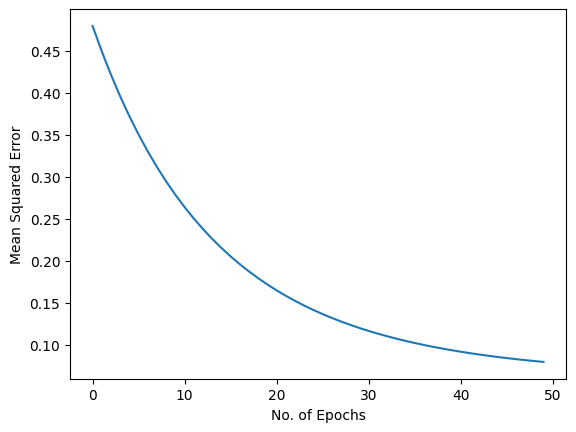

In [78]:
plt.plot(range(len(cost)), cost)
plt.xlabel('No. of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()


In [79]:
ones = torch.ones(y_train.size(0))
zero = torch.zeros(y_train.size(0))
train_pred = model.forward(X_train)

train_acc = torch.mean(
    (torch.where(train_pred > 0.5, ones, zero).int() == y_train).float())
# print(train_acc)

ones = torch.ones(y_test.size(0))
zero = torch.zeros(y_test.size(0))
test_pred = model.forward(X_test)

test_acc = torch.mean(
    (torch.where(test_pred > 0.5, ones, zero).int() == y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)


Training Accuracy : 0.94
Testing Accuracy: 0.92


---

# 4. Logistic Regression

In [80]:
def train(model, x, y, n_epoch=10, lr=0.001, seed=23, bsz=50):
    cost = []
    torch.manual_seed(seed)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for i in range(n_epoch):
        shuffledData = torch.randperm(y.size(0))
        batches = torch.split(shuffledData, bsz)

        for idx in batches:
            # 1. Compute the Output
            yHat = model.forward(x[idx])

            # 2. Compute the Loss
            loss = torch.nn.functional.binary_cross_entropy(
                torch.sigmoid(yHat), y[idx])

            # 3. Compute the Gradients
            optimizer.zero_grad()
            loss.backward()

            # 4. Update the Model Parameters
            optimizer.step()

            # model.weight=model.weight-lr*grad_w
            # model.bias=model.bias-lr*grad_b

        # 5. Log and print the Loss
        with torch.no_grad():
            yHat = model.forward(x)
            curr_loss = loss_fn(yHat, y)
            print('Epoch : %3d ' % (i + 1), end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)

    return cost


In [81]:
n_feature = X_train.size(1)
model = NeuralNetworkPyTorch(n_features=n_feature)


In [82]:
cost = train(model, X_train, y_train, n_epoch=50)


Epoch :   1 | MSE  0.50297
Epoch :   2 | MSE  0.49340
Epoch :   3 | MSE  0.48416
Epoch :   4 | MSE  0.47523
Epoch :   5 | MSE  0.46661
Epoch :   6 | MSE  0.45829
Epoch :   7 | MSE  0.45027
Epoch :   8 | MSE  0.44254
Epoch :   9 | MSE  0.43510
Epoch :  10 | MSE  0.42795
Epoch :  11 | MSE  0.42107
Epoch :  12 | MSE  0.41446
Epoch :  13 | MSE  0.40813
Epoch :  14 | MSE  0.40205
Epoch :  15 | MSE  0.39624
Epoch :  16 | MSE  0.39068
Epoch :  17 | MSE  0.38536
Epoch :  18 | MSE  0.38030
Epoch :  19 | MSE  0.37547
Epoch :  20 | MSE  0.37088
Epoch :  21 | MSE  0.36652
Epoch :  22 | MSE  0.36239
Epoch :  23 | MSE  0.35848
Epoch :  24 | MSE  0.35480
Epoch :  25 | MSE  0.35133
Epoch :  26 | MSE  0.34807
Epoch :  27 | MSE  0.34501
Epoch :  28 | MSE  0.34217
Epoch :  29 | MSE  0.33952
Epoch :  30 | MSE  0.33707
Epoch :  31 | MSE  0.33481
Epoch :  32 | MSE  0.33274
Epoch :  33 | MSE  0.33086
Epoch :  34 | MSE  0.32916
Epoch :  35 | MSE  0.32764
Epoch :  36 | MSE  0.32630
Epoch :  37 | MSE  0.32513
E

[]

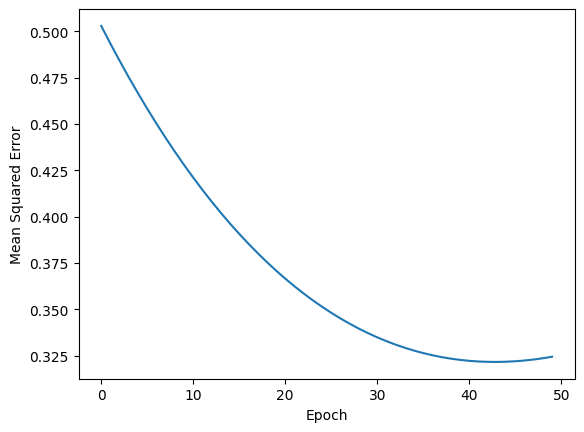

In [83]:
plt.plot(range(len(cost)), cost)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot()


In [84]:
ones = torch.ones(y_train.size(0))
zero = torch.zeros(y_train.size(0))
train_pred = model.forward(X_train)

train_acc = torch.mean(
    (torch.where(train_pred > 0.5, ones, zero).int() == y_train).float())
# print(train_acc)

ones = torch.ones(y_test.size(0))
zero = torch.zeros(y_test.size(0))
test_pred = model.forward(X_test)

test_acc = torch.mean(
    (torch.where(test_pred > 0.5, ones, zero).int() == y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)


Training Accuracy : 0.62
Testing Accuracy: 0.69
